# Homework 1

Consider the following maximization problem:
    <br>$$\max_{x}    x_1 + \frac{1}{4}x_2$$
    <br>$$\frac{1}{2}x_1 + x_2 \leq 1$$
    <br>$$2x_1 + x_2 \leq 2$$
    <br>$$x_1 \geq 0, x_2 \geq 0$$

### A. Guess the solution. Plot the constraints and the objective function. Justify your guess.

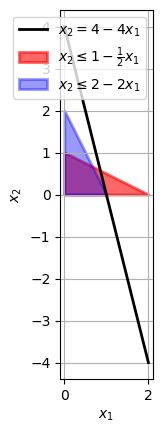

In [4]:
using PyPlot
PyPlot.svg(true)

x1 = collect(0:0.1:2);
x2a = 1 .- 0.5*x1;
x2b = ifelse.(2 .- 2*x1.>=0, 2 .- 2*x1,NaN);
x2c = 4 .- 4*x1;
fig = figure()

ax = fig.add_subplot(1,1,1)
ax.fill_between(x1,x2a,facecolor="red",color="red",where=x2a  .>= 0,linewidth=2,
    label=L"x_{2} \leq 1 - \frac{1}{2}x_{1}", alpha=0.6);
ax.fill_between(x1,x2b,facecolor="blue",color="blue",where=x2b .>= 0,linewidth=2,
    label=L"x_{2} \leq 2 - 2x_{1}",alpha=0.4);
ax.plot(x1,x2c,color="black",linewidth=2,label=L"x_{2} = 4 - 4x_{1}",alpha=1);
ax.legend(loc="upper right");

ax.set_xlabel(L"x_{1}");
ax.set_ylabel(L"x_{2}");
ax.grid(true);
ax.axis("scaled");

Seeing how the three lines only intersect at $(x_1 = 1, x_2 = 0)$, the solution is unique at that point. 

### B. Using Julia define and solve the above problem 'as is'.

In [ ]:
using JuMP, GLPK

myModel = Model(with_optimizer(GLPK.Optimizer))
@variable(myModel, x1 >= 0)
@variable(myModel, x2 >= 0)
@constraint(myModel, 0.5*x1 + x2 <= 1)
@constraint(myModel, 2*x1 + x2 <= 2)
@objective(myModel, Max, x1+0.25*x2)
print(myModel)

In [ ]:
@time begin
    status = optimize!(myModel)
end
println("Objective value: ", JuMP.objective_value(myModel))
println("x1 = ", JuMP.value(x1))
println("x2 = ", JuMP.value(x2))

### C. Rewrite it in the standard form.

<br>$$\min_{x}    -x_1 -\frac{1}{4}x_2$$
<br>$$\frac{1}{2}x_1 + x_2 + x_3 = 1$$
<br>$$2x_1 + x_2 + x_3 = 2$$
<br>$$x_1 \geqslant 0, x_2 \geqslant 0$$

### D. Using Julia define and solve the above problem in the standard form.

In [2]:
using JuMP, GLPK

myModel1 = Model(with_optimizer(GLPK.Optimizer))
@variable(myModel1, x1 >= 0)
@variable(myModel1, x2 >= 0)
@variable(myModel1, x3 >= 0)
@variable(myModel1, x4 >= 0)
@constraint(myModel1, 0.5*x1 + x2 + x3 == 1)
@constraint(myModel1, 2*x1 + x2 + x4 == 2)
@objective(myModel1, Min, -x1-0.25*x2)
print(myModel1)

Min -x1 - 0.25 x2
Subject to
 0.5 x1 + x2 + x3 = 1.0
 2 x1 + x2 + x4 = 2.0
 x1 ≥ 0.0
 x2 ≥ 0.0
 x3 ≥ 0.0
 x4 ≥ 0.0


In [3]:
@time begin
    status = optimize!(myModel1)
end
println("Objective value: ", JuMP.objective_value(myModel1))
println("x1 = ", JuMP.value(x1))
println("x2 = ", JuMP.value(x2))
println("x3 = ", JuMP.value(x3))
println("x3 = ", JuMP.value(x4))

  9.154210 seconds (39.21 M allocations: 1.978 GiB, 9.81% gc time)
Objective value: -1.0
x1 = 1.0
x2 = 0.0
x3 = 0.5
x3 = 0.0


### E. Compare the solutions in item B and D.

They are identical as they should be.

### F. Rework items A and B if the objective function is  x1+x2.


In [ ]:
# F. A. 

x1 = collect(0:0.1:2);
x2a = 1 .- 0.5*x1;
x2b = ifelse.(2 .- 2*x1.>=0, 2 .- 2*x1,NaN);
x2c = 4/3 .- x1;
fig = figure()

ax = fig.add_subplot(1,1,1)
ax.fill_between(x1,x2a,facecolor="red",color="red",where=x2a  .>= 0,linewidth=2,
    label=L"x_{2} \leq 1 - \frac{1}{2}x_{1}", alpha=0.6);
ax.fill_between(x1,x2b,facecolor="blue",color="blue",where=x2b .>= 0,linewidth=2,
    label=L"x_{2} \leq 2 - 2x_{1}",alpha=0.4);
ax.plot(x1,x2c,color="black",linewidth=2,label=L"x_{2} = \frac{4}{3} - x_{1}",alpha=1);
ax.legend(loc="upper right");

ax.set_xlabel(L"x_{1}");
ax.set_ylabel(L"x_{2}");
ax.grid(true);
ax.axis("scaled");

The objective function only intersects with the feasible region at one point, $(x_1 = \frac{2}{3}, x_2 = \frac{2}{3})$, and that seems to be the answer.

In [ ]:
# F. B. 

myModel = Model(with_optimizer(GLPK.Optimizer))
@variable(myModel, x1 >= 0)
@variable(myModel, x2 >= 0)
@constraint(myModel, 0.5*x1 + x2 <= 1)
@constraint(myModel, 2*x1 + x2 <= 2)
@objective(myModel, Max, x1+x2)
print(myModel)

@time begin
    status = optimize!(myModel)
end
println("Objective value: ", JuMP.objective_value(myModel))
println("x1 = ", JuMP.value(x1))
println("x2 = ", JuMP.value(x2))